# Homework 2 Regression Refresher

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

***
## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) First task: Filtering data
- Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
- Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [138]:
using CSV
using DataFrames
using Statistics

df = CSV.read("cars.csv", DataFrame)

cyl8 = df[df.cyl .== 8, :]
c8_av_mpg = round(mean(cyl8[!, :mpg]), digits=1)
cyl46 = df[(df.cyl .== 4) .| (df.cyl .== 6), :]
c46_av_mpg = round(mean(cyl46[!, :mpg]), digits=1)

printstyled("The average MPG for 8 cylinder vehicles is $(c8_av_mpg)\n"; color=:blue)
printstyled("The average MPG for 4/6 cylinder vehicles is $(c46_av_mpg)\n"; color=:blue)

The average MPG for 8 cylinder vehicles is 15.1
The average MPG for 4/6 cylinder vehicles is 24.0


### b) Second task: Analyze using linear regression

To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 

32×13 DataFrame
 Row │ brand_reference      mpg      cyl    disp     hp     drat     wt       qsec     vs     am     gear   carb   Group 
     │ String31             Float64  Int64  Float64  Int64  Float64  Float64  Float64  Int64  Int64  Int64  Int64  Bool  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Mazda RX4               21.0      6    160.0    110     3.9     2.62     16.46      0      1      4      4  false
   2 │ Mazda RX4 Wag           21.0      6    160.0    110     3.9     2.875    17.02      0      1      4      4  false
   3 │ Datsun 710              22.8      4    108.0     93     3.85    2.32     18.61      1      1      4      1  false
   4 │ Hornet 4 Drive          21.4      6    258.0    110     3.08    3.215    19.44      1      0      3      1  false
   5 │ Hornet Sportabout       18.7      8    360.0    175     3.15    3.44     17.02      0      0      3      2   true
   6 │ Valian

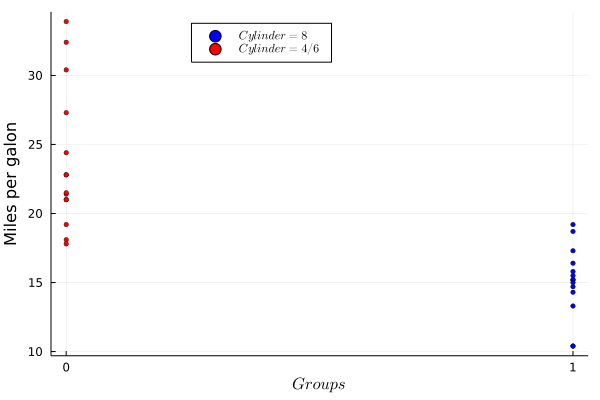

In [125]:
using Plots
using LaTeXStrings

df.Group = df.cyl .== 8;
print(df)
mpg_c8 = cyl8[!, :mpg]
sctrp1 = scatter(ones(size(mpg_c8)[1]), mpg_c8, markerstrokewidth=0.5, markersize=2.5, color=:blue, label=L"Cylinder=8")
sctrp1 = scatter!(zeros(size(mpg_c8)[1]), cyl46[!, :mpg], markerstrokewidth=0.5, markersize=2.5, color=:red, label=L"Cylinder=4/6")
scatter!(sctrp1, xlabel=L"Groups", ylabel="Miles per galon", xtick=[0, 1], leg=:top)

- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept: 

 $\beta = (X^T X)^{-1}X^T \vec{y}$
 
 Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 

In [142]:
using LinearAlgebra

function linear_reg(x, y)
    X = hcat(ones(size(x)[1]), x)
    return inv(transpose(X)*X)*transpose(X)*y
end

m, b = [floor(v) for v in linear_reg(Group, mpg)]
printstyled("The slope in the linear model is $(m)\n"; color=:blue)
printstyled("The intercept in the linear model is $(b)\n"; color=:blue)

The slope in the linear model is 23.0
The intercept in the linear model is -9.0


- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?

<div class="alert alert-block alert-info">
<b>Comments: The slope in the linear model is almost the same average MPG value of 4/6-cylinder vehicles. Note that the number of data regarding vehicles with 4/6-cylinder capacity is higher than those with eight-cylinder capacity</b>.
</div>